# The Sparks Foundation Internship GRIP JUNE 2021

# Task 1 (CV & IOT ) : Object Detection using OpenCV Python

# By Sachin Sarkar

#### Task Objective : Implement an object detector which identifies the classes of the objects in an image or video.

#### Algorithm used : Single Shot Detector (SSD)

.

Importing Matplotlib.pyplot and Opencv

In [1]:
import matplotlib.pyplot as plt

In [2]:
import cv2

Initializing Configuration file and frozen inference graph for object detection model

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

Creating DNN Detection model 

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

Inserting labels to classlabels List

In [5]:
classLabels = [] 
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels= fpt.read().rstrip('\n').split('\n')

In [6]:
classLabels

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
len(classLabels)

80

Model Preprocessing

In [8]:
model.setInputSize(320, 320)
model.setInputScale(1.0 / 127.5)  
model.setInputMean((127.5, 127.5, 127.5)) 
model.setInputSwapRB(True)

<dnn_Model 00000141B3F738B0>

Inserting targetable Image for Object Detection

In [9]:
img = cv2.imread('street-of-kolkata-west-bengal.jpg')

Model Detecting Objects in this feeded image

In [10]:
classIndex, confidece, bbox = model.detect(img, confThreshold=0.5)

In [11]:
classIndex

array([[3],
       [3],
       [8],
       [3],
       [8],
       [3],
       [3]], dtype=int32)

Real Image before processing Model : Kolkata, West Bengal, India

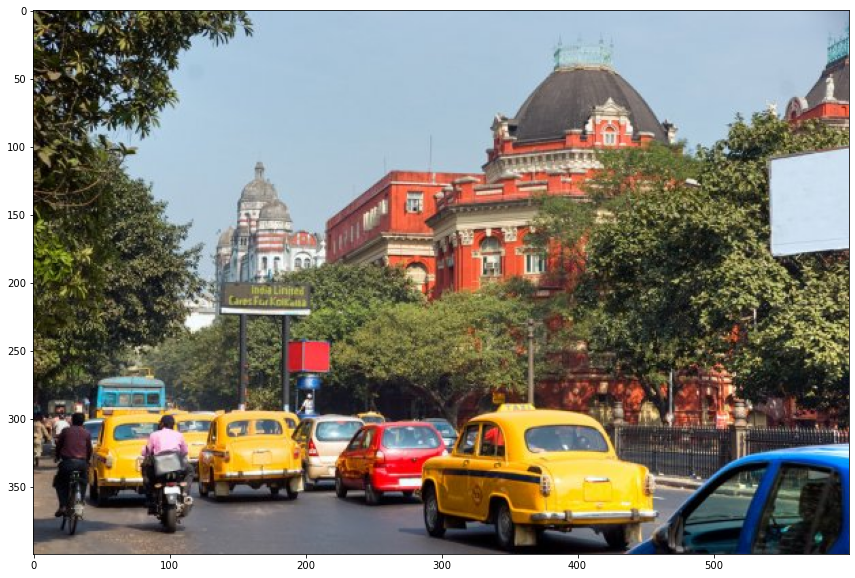

In [12]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Processing Object Detection to the image

In [13]:
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(classIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 100, 200), 2)
    cv2.putText(img, classLabels[ClassInd - 1], (boxes[0] + 10, boxes[1] + 40), font, fontScale=font_scale,
                color=(0, 0, 0), thickness=2)

##### Final Object Detected Image

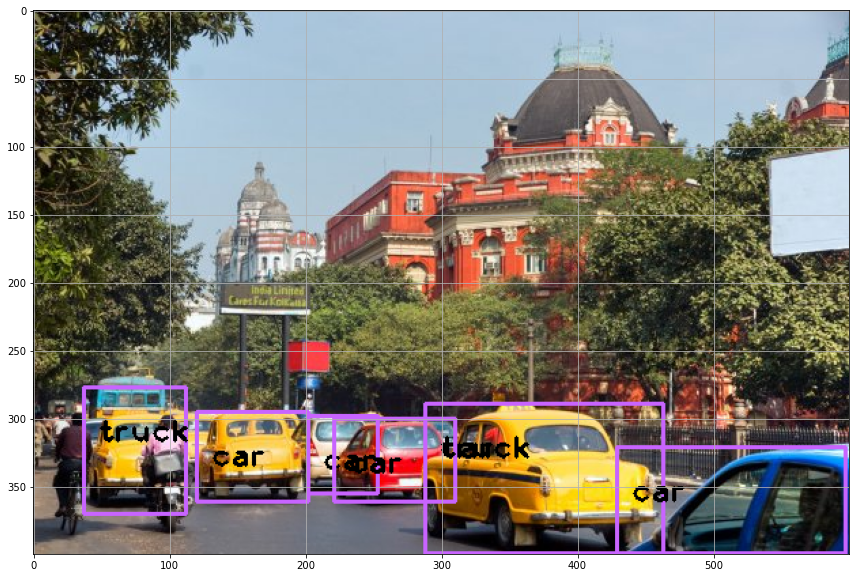

In [14]:
plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.grid(True)
plt.show()

# Thank You